## Get the data

Use the Jupyter file from the last lab (Customer Analysis Round 3)

In [1]:
import pandas as pd
import numpy as np
import data_cleaning_function as dc
data= pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [2]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#I start with my data cleaning process like the LAB before
data = dc.replace_column_lower(data,' ','_')

In [4]:
data.isna().sum()/data.shape[0]*100

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [6]:
data = dc.chance_object_to_datetime(data,'effective_to_date')

C:\Users\schue\IronHack\Bootcamp\Week_2\Day_1\Afternoon\lab-data-transformations\data_cleaning_function.py:91: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [7]:
for col in data.select_dtypes(object):   
    display(col,data[col].unique())

'customer'

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

'state'

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

'response'

array(['No', 'Yes'], dtype=object)

'coverage'

array(['Basic', 'Extended', 'Premium'], dtype=object)

'education'

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

'employmentstatus'

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

'gender'

array(['F', 'M'], dtype=object)

'location_code'

array(['Suburban', 'Rural', 'Urban'], dtype=object)

'marital_status'

array(['Married', 'Single', 'Divorced'], dtype=object)

'policy_type'

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

'policy'

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

'renew_offer_type'

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

'sales_channel'

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

'vehicle_class'

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

'vehicle_size'

array(['Medsize', 'Small', 'Large'], dtype=object)

# Complete the following task

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [8]:
column_numerical = data.select_dtypes(np.number)
column_categorical = data.select_dtypes(object)

## Now we will try to check the normality of the numerical variables visually. Use seaborn library to construct distribution plots for the numerical variables Use Matplotlib to construct histograms Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

column_numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

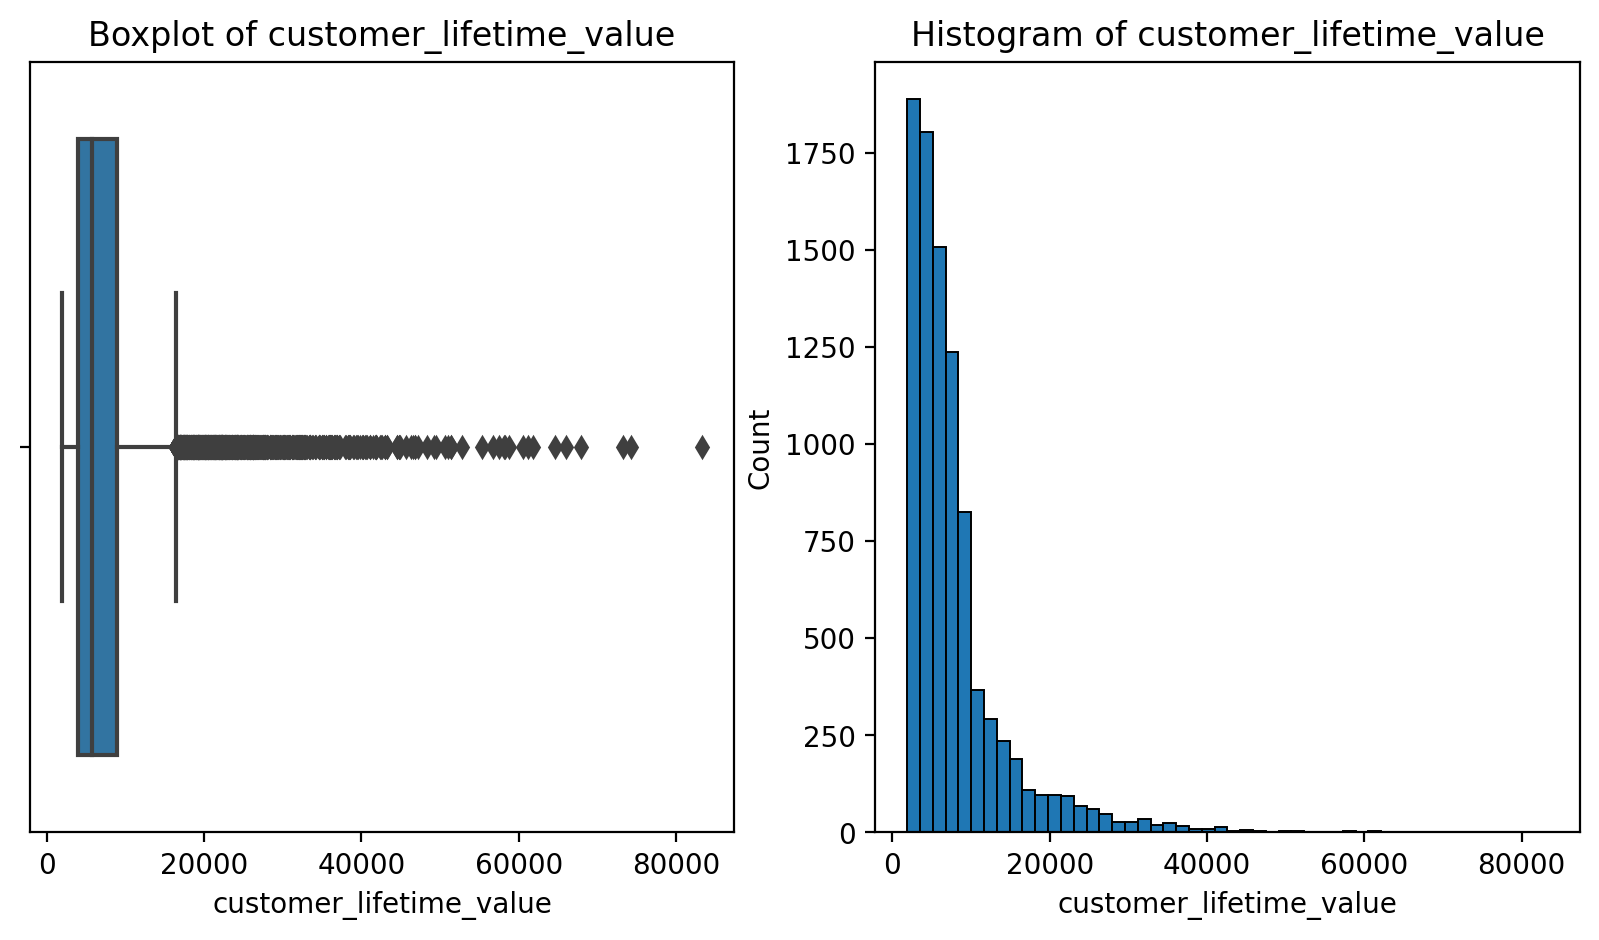

Skew: 3.0322802599299847


In [10]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=200)
sns.boxplot(x=data['customer_lifetime_value'], ax=ax[0])
ax[0].set_title("Boxplot of customer_lifetime_value")
ax[1].hist(x=data['customer_lifetime_value'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of customer_lifetime_value")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('customer_lifetime_value')
plt.show()
print('Skew:',data['customer_lifetime_value'].skew())

In [11]:
#The skew is above 2, so i woud appy a transformation.

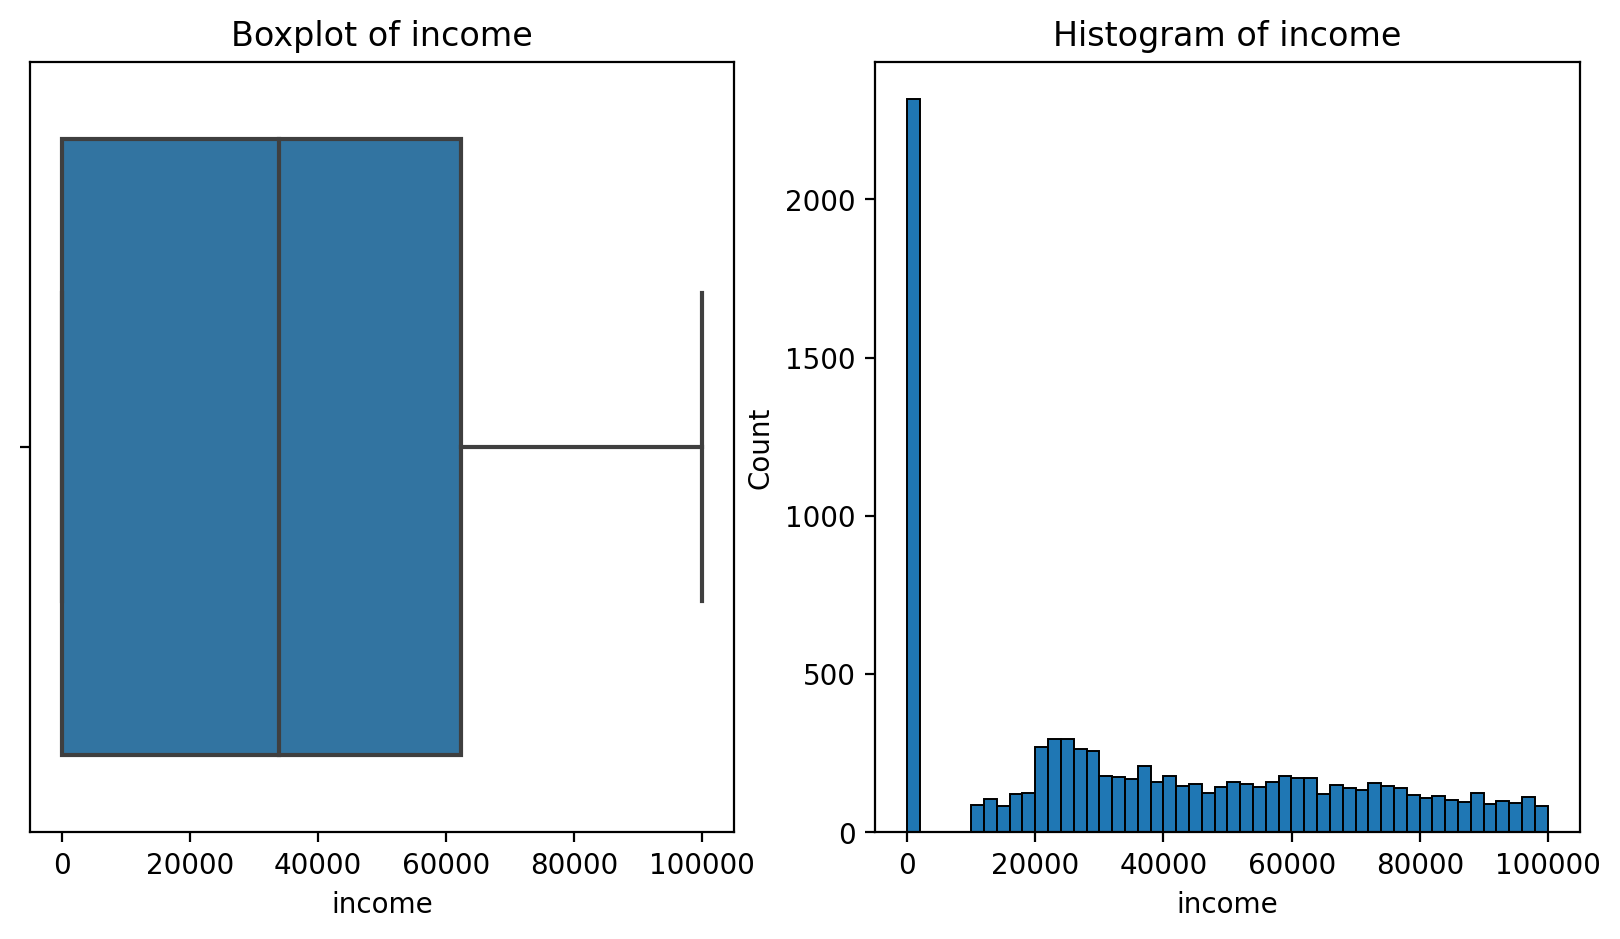

Skew: 0.28688727581189166


In [12]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=200)
sns.boxplot(x=data['income'], ax=ax[0])
ax[0].set_title("Boxplot of income")
ax[1].hist(x=data['income'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of income")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('income')
plt.show()
print('Skew:',data['income'].skew())

In [13]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

In [14]:
#as in the Lab befor i will display the distribution of the income in two groups, 
#1. group with all customers
#2. group with customers with a income bigger then 0
data_income_bigger_0 = dc.drop_null(data,'income')

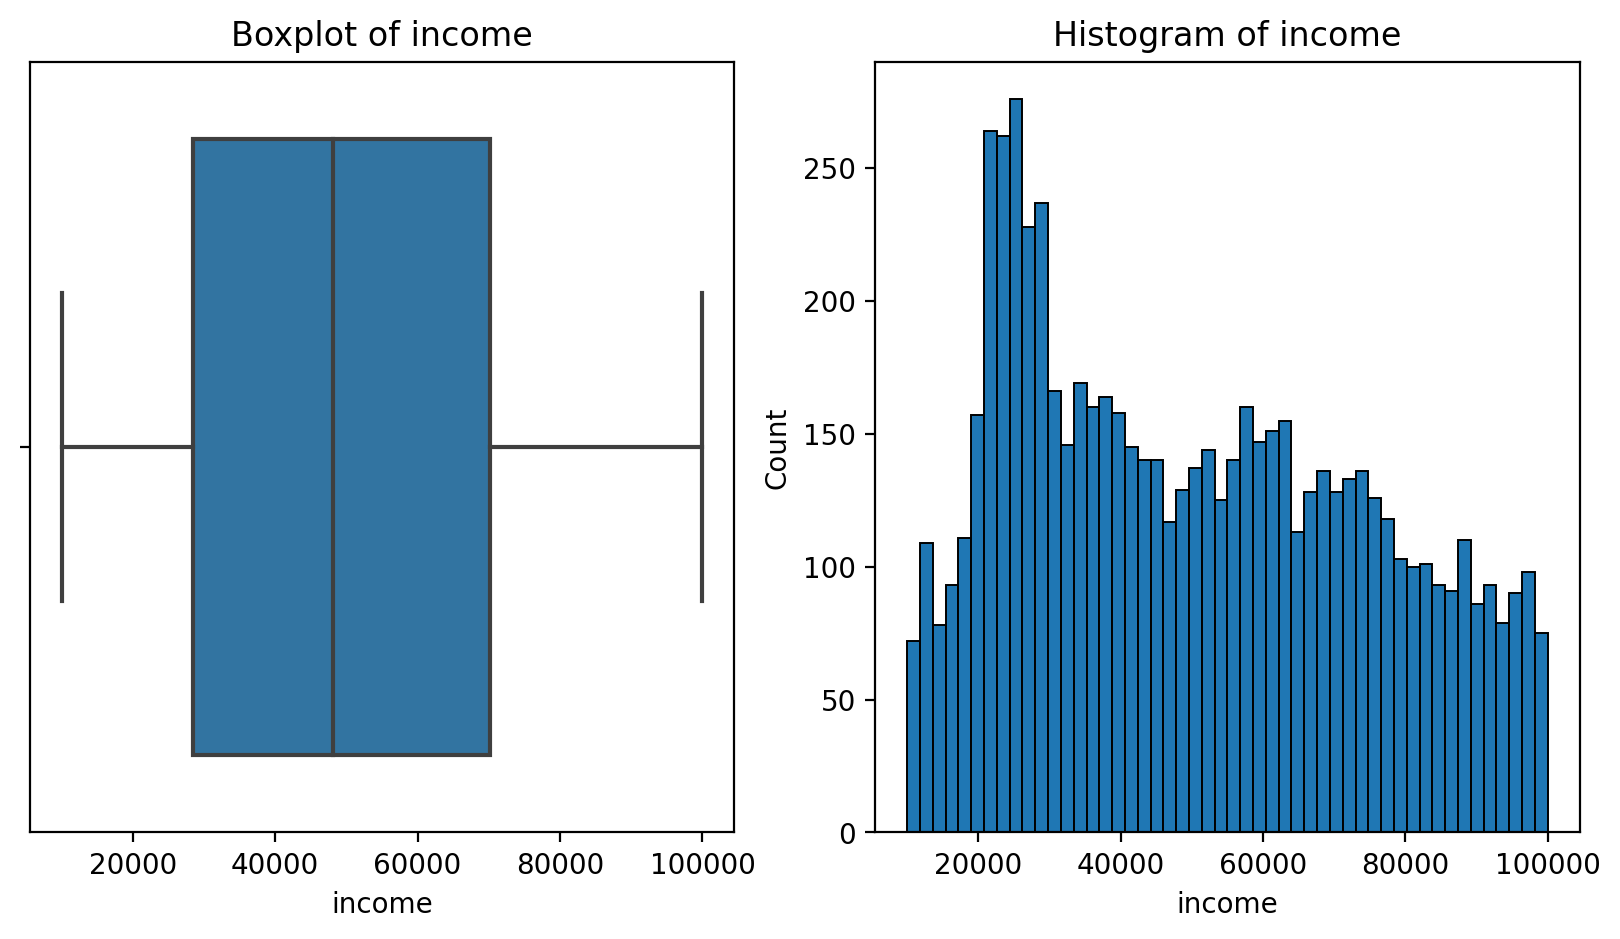

Skew: 0.28688727581189166


In [15]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=200)
sns.boxplot(x=data_income_bigger_0['income'], ax=ax[0])
ax[0].set_title("Boxplot of income")
ax[1].hist(x=data_income_bigger_0['income'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of income")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('income')
plt.show()
print('Skew:',data['income'].skew())

In [16]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

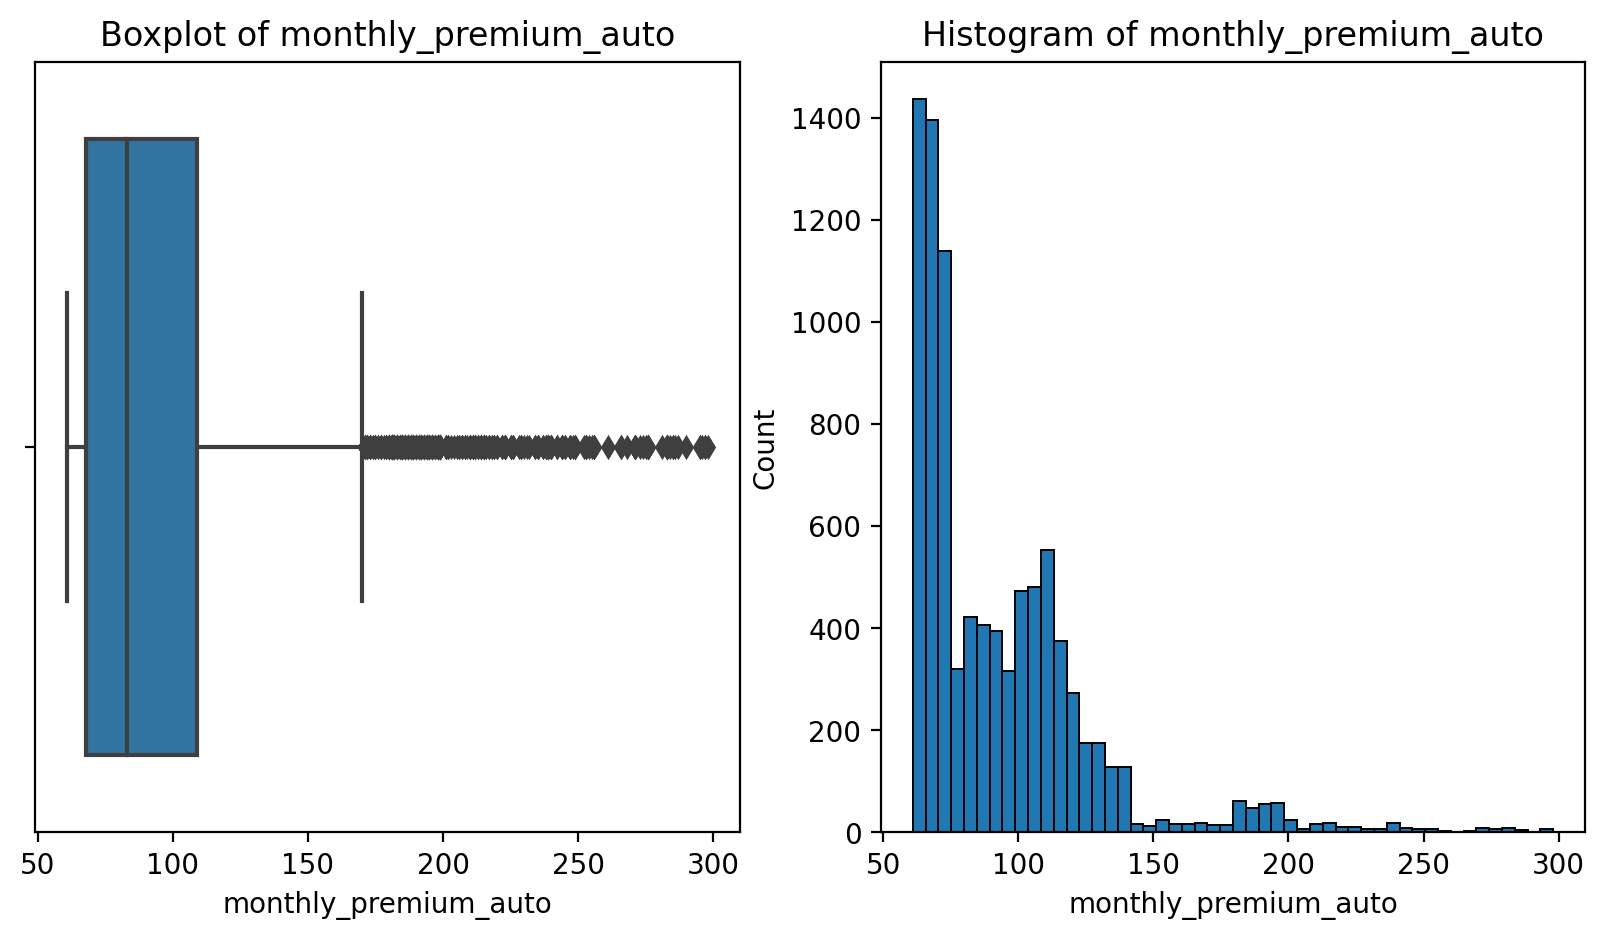

Skew: 2.1235464499475345


In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=200)
sns.boxplot(x=data['monthly_premium_auto'], ax=ax[0])
ax[0].set_title("Boxplot of monthly_premium_auto")
ax[1].hist(x=data['monthly_premium_auto'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of monthly_premium_auto")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('monthly_premium_auto')
plt.show()
print('Skew:',data['monthly_premium_auto'].skew())

In [18]:
#The skew is above 2, so i woud appy a transformation.

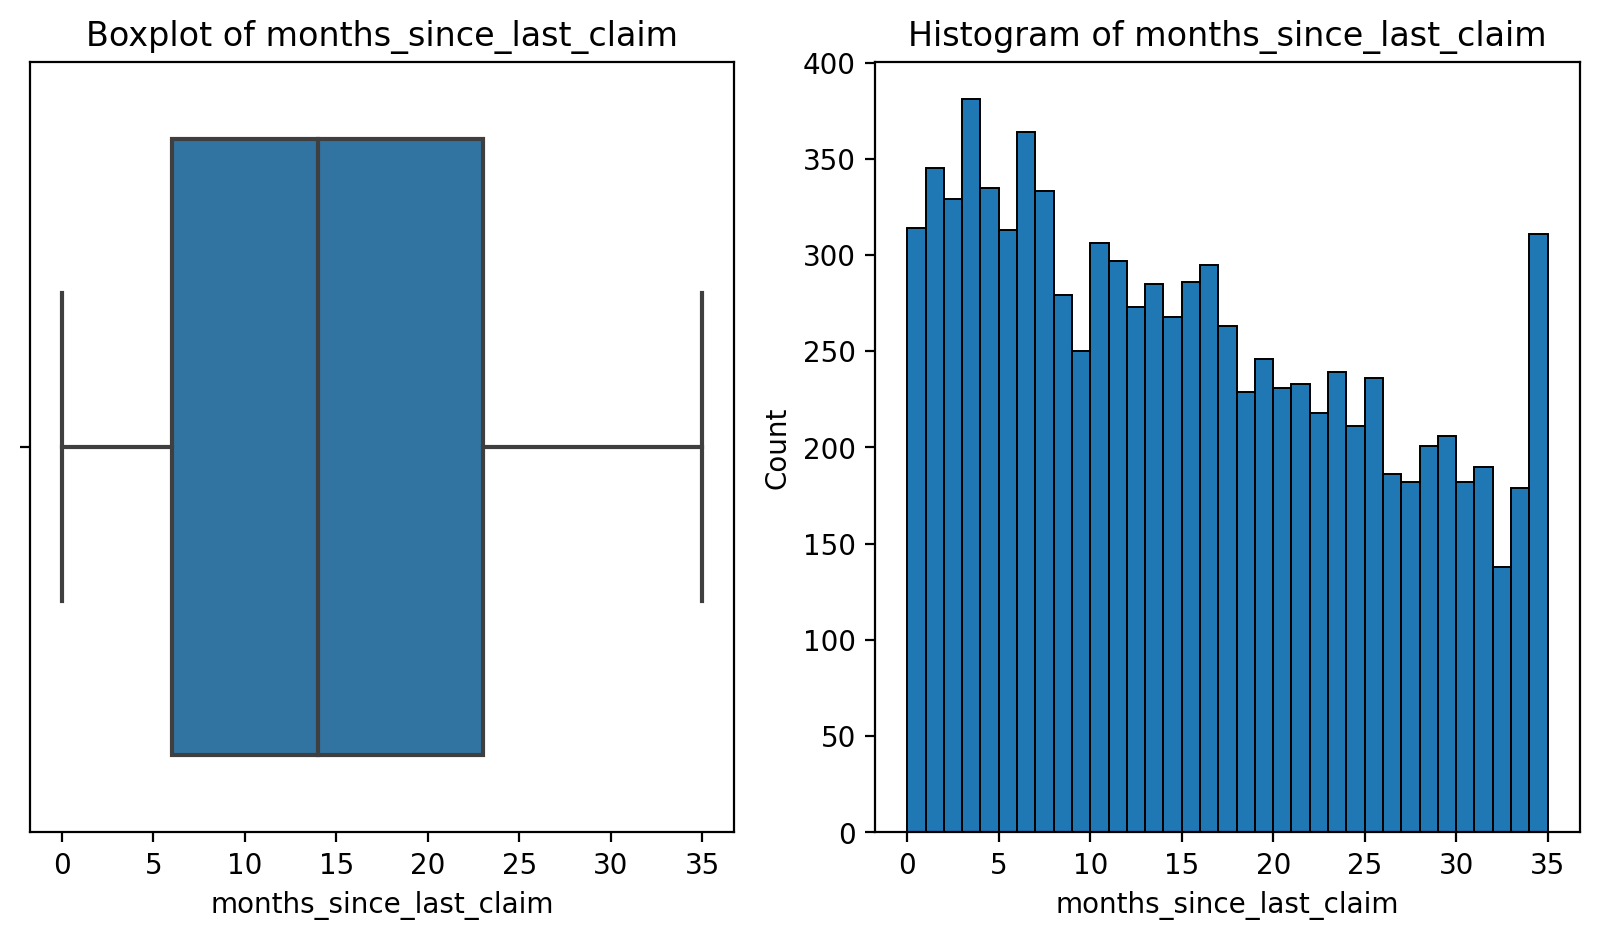

Skew: 0.2785863118107981


In [19]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=200)
sns.boxplot(x=data['months_since_last_claim'], ax=ax[0])
ax[0].set_title("Boxplot of months_since_last_claim")
ax[1].hist(x=data['months_since_last_claim'], bins=35, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of months_since_last_claim")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('months_since_last_claim')
plt.show()
print('Skew:',data['months_since_last_claim'].skew())

In [20]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

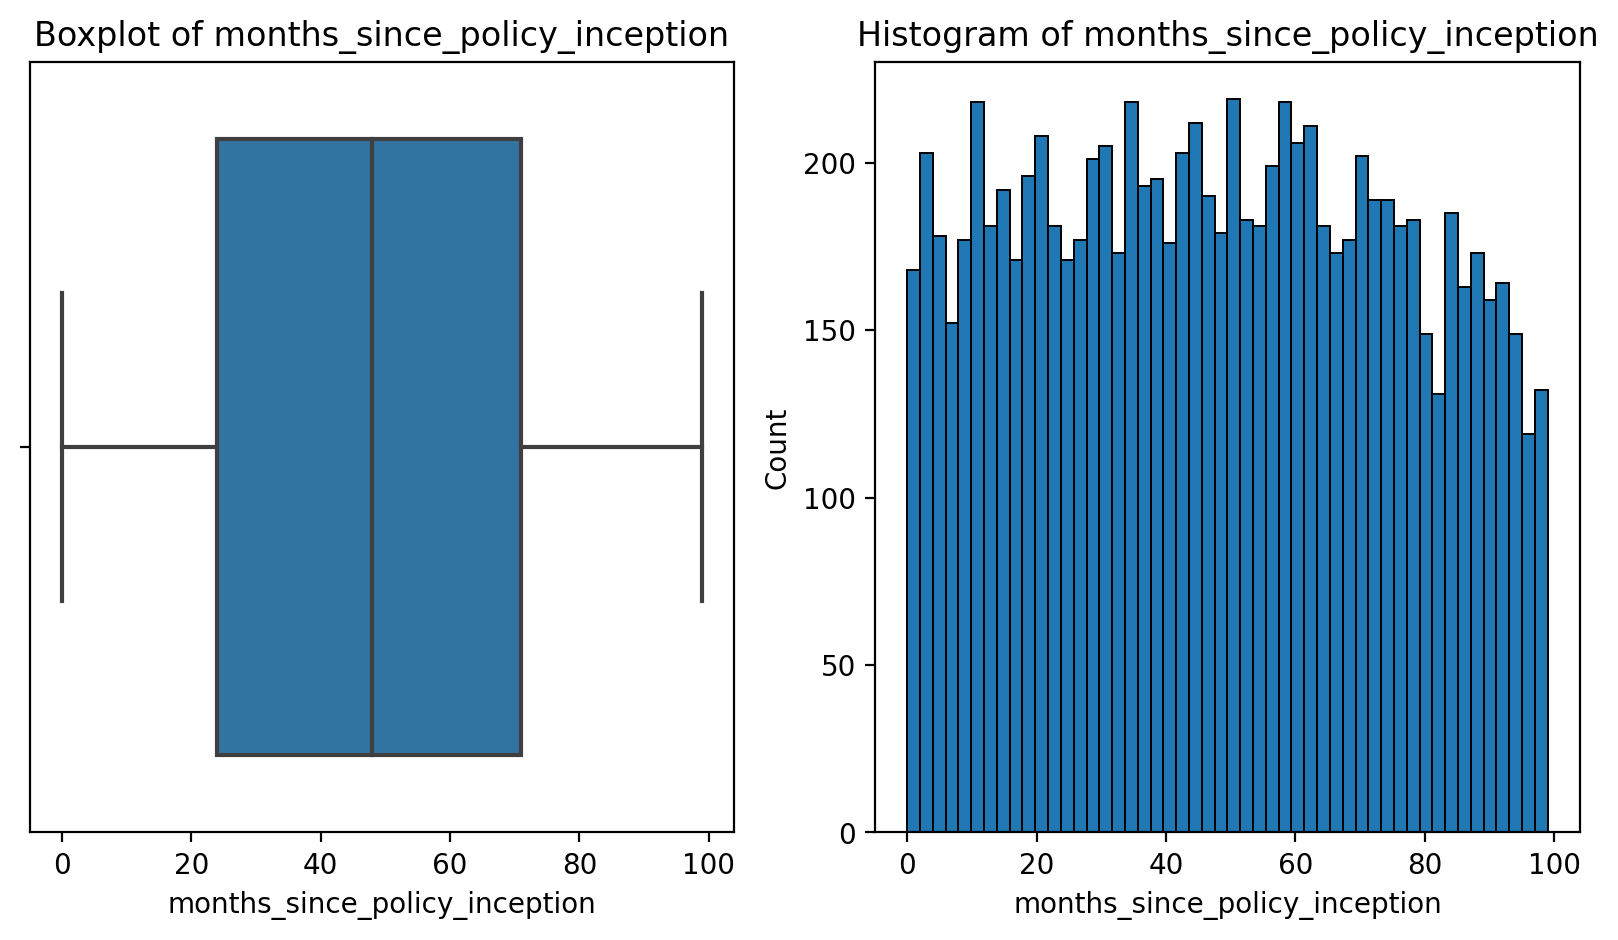

Skew: 0.040164961597799524


In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=200)
sns.boxplot(x=data['months_since_policy_inception'], ax=ax[0])
ax[0].set_title("Boxplot of months_since_policy_inception")
ax[1].hist(x=data['months_since_policy_inception'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of months_since_policy_inception")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('months_since_policy_inception')
plt.show()
print('Skew:',data['months_since_policy_inception'].skew())

In [22]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

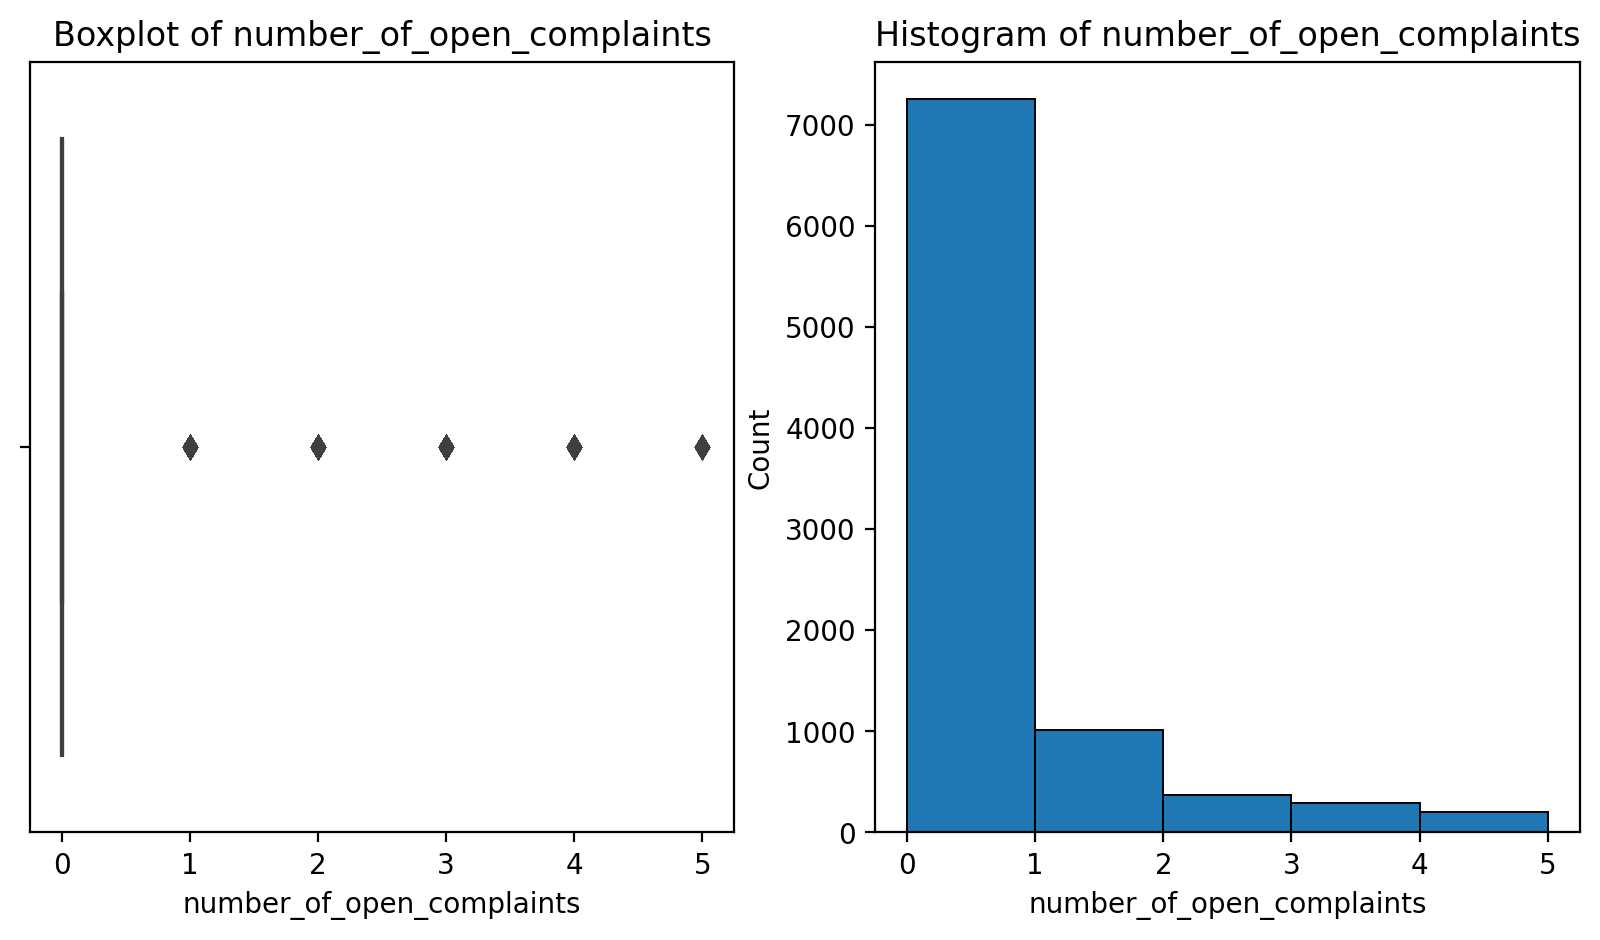

Skew: 2.783263052399567


In [23]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=200)
sns.boxplot(x=data['number_of_open_complaints'], ax=ax[0])
ax[0].set_title("Boxplot of number_of_open_complaints")
ax[1].hist(x=data['number_of_open_complaints'], bins=5, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of number_of_open_complaints")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('number_of_open_complaints')
plt.show()
print('Skew:',data['number_of_open_complaints'].skew())

In [24]:
#The skew is above 2, so i woud appy a transformation.

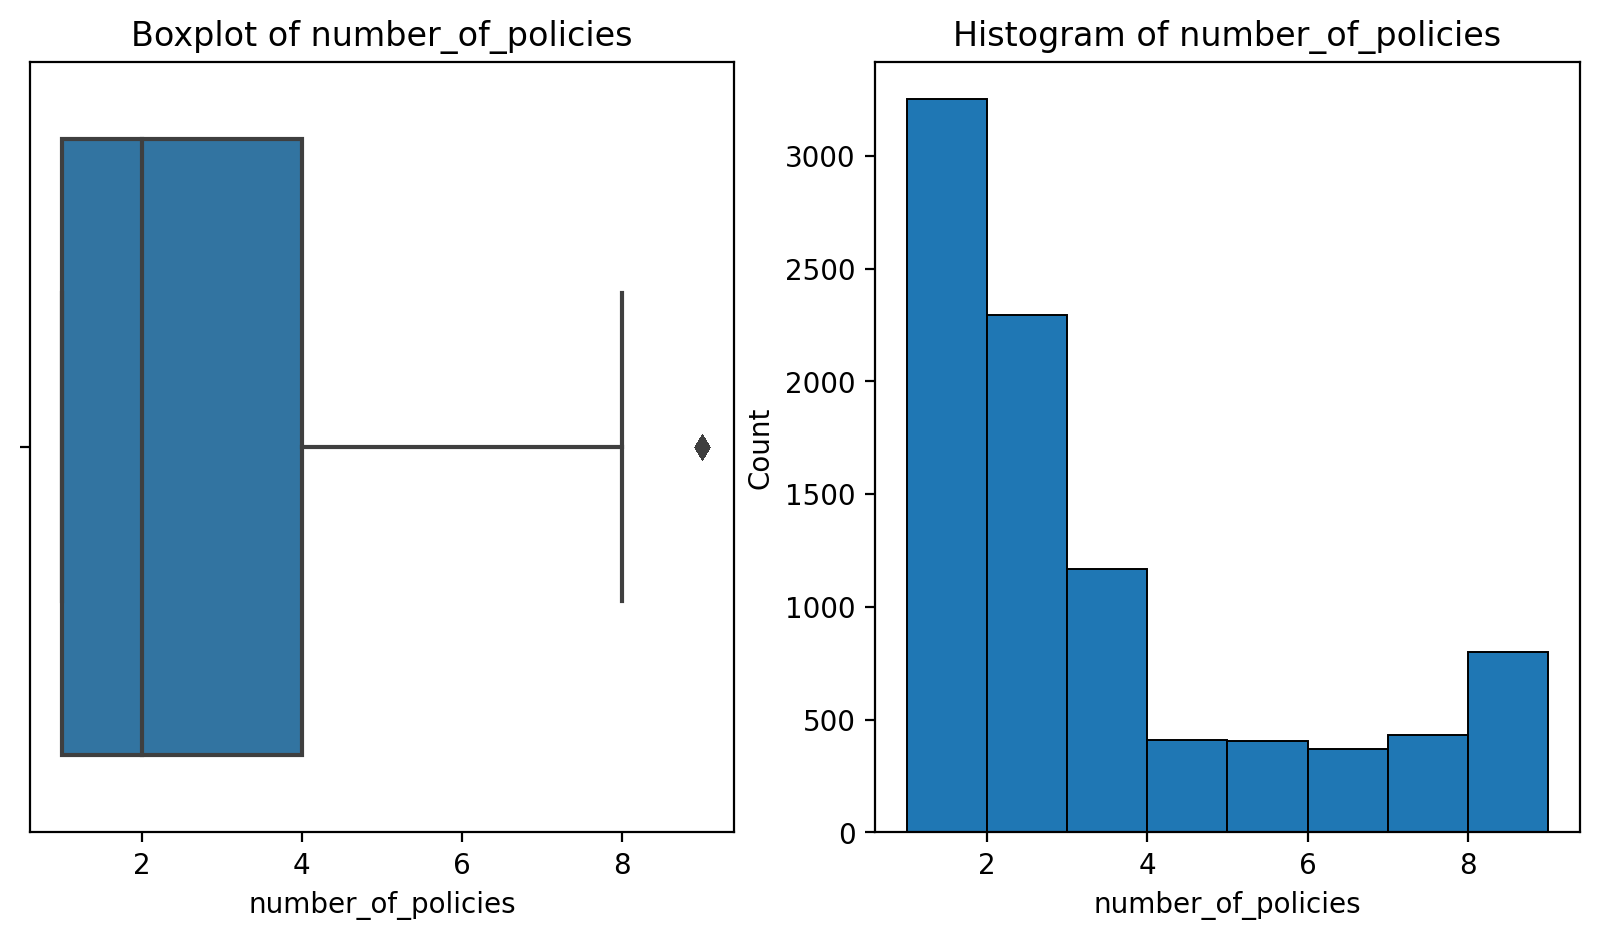

Skew: 1.2533327352739663


In [25]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=200)
sns.boxplot(x=data['number_of_policies'], ax=ax[0])
ax[0].set_title("Boxplot of number_of_policies")
ax[1].hist(x=data['number_of_policies'], bins=8, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of number_of_policies")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('number_of_policies')
plt.show()
print('Skew:',data['number_of_policies'].skew())

In [26]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

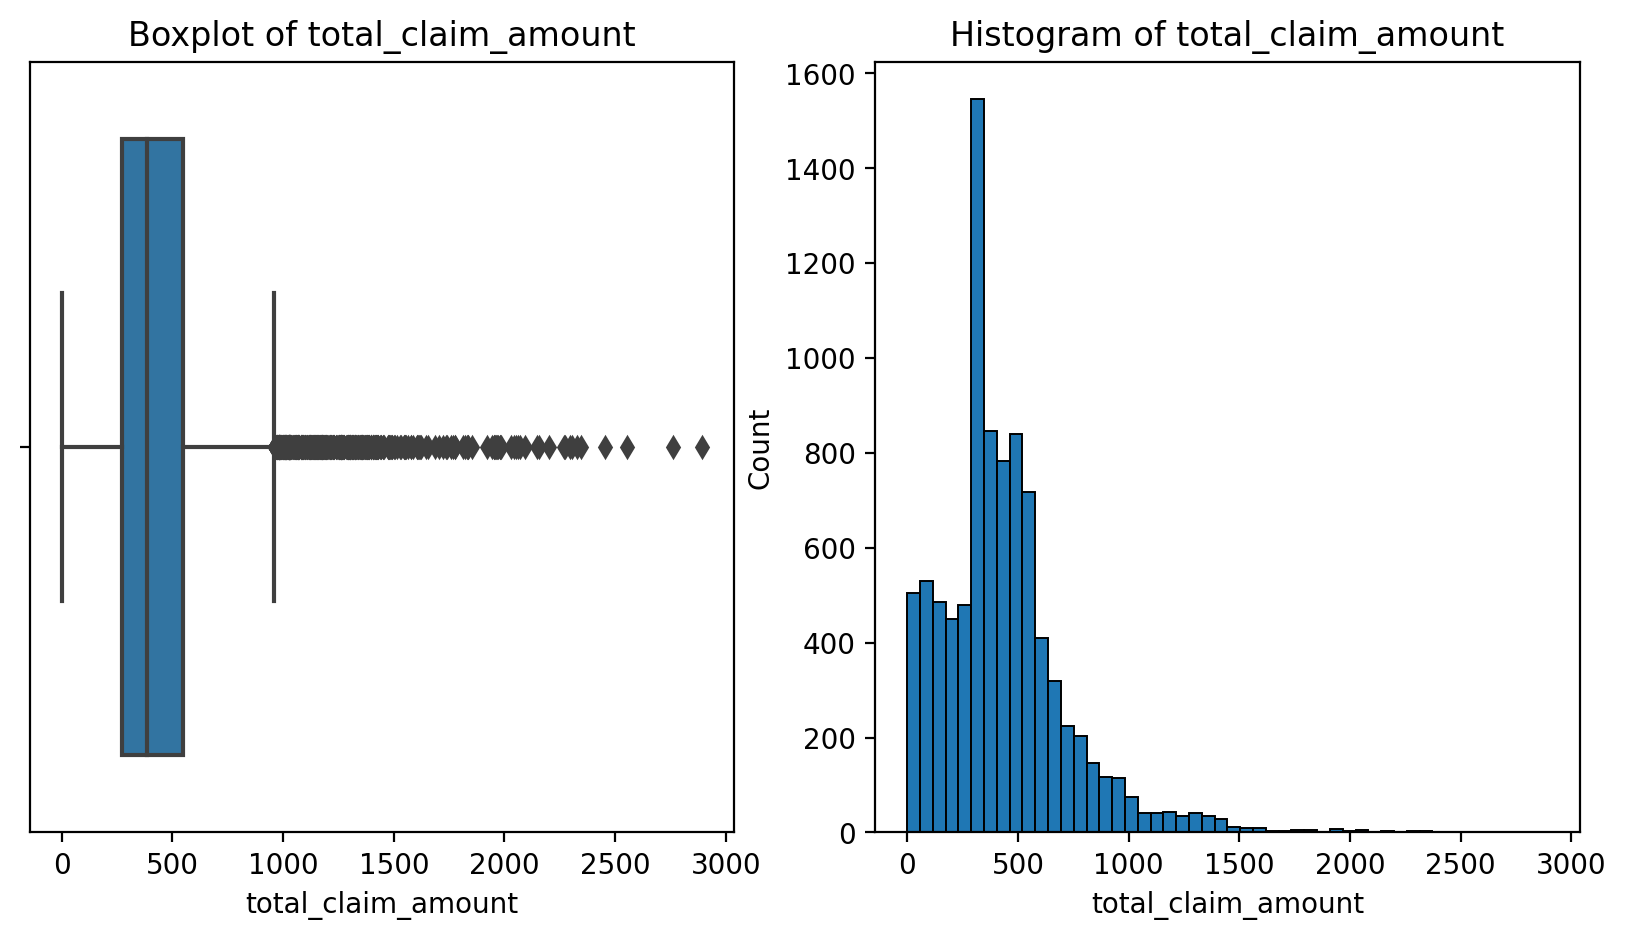

Skew: 1.7149658097209557


In [27]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=200)
sns.boxplot(x=data['total_claim_amount'], ax=ax[0])
ax[0].set_title("Boxplot of total_claim_amount")
ax[1].hist(x=data['total_claim_amount'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of total_claim_amount")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('total_claim_amount')
plt.show()
print('Skew:',data['total_claim_amount'].skew())

In [28]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

In [ ]:
sns.pairplot(data.select_dtypes(np.number))

C:\Users\schue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [ ]:
def select_features_for_linear_models_based_on_correlation(df: pd.DataFrame, y: str, threshold=0.75) -> list:
    '''
    This function picks a DataFrame and a `y` column computes the correlation matrix between all the numerical
    columns. Then it returns a Python list with the columns that have a abs(corr(x,y)) >= 0.75

    Inputs:
    df: Pandas DataFrame
    y: string with the column to be considered `y`

    Outputs:
    list of columns highñy correlated with the `y` column
    '''

    df2 = df.copy()
    df2 = df2.select_dtypes([float,int])
    
    correlation_matrix = df2.corr()
    correlation_matrix.drop(y,axis=0, inplace=True)
    
    selected_columns = correlation_matrix[y]

    list_of_selected_columns = correlation_matrix[abs(selected_columns) >= threshold].index.tolist()
    

    return list_of_selected_columns

In [ ]:
select_features_for_linear_models_based_on_correlation(column_numerical,'total_claim_amount',0.0)

In [ ]:
correlations_matrix = column_numerical.corr()
correlations_matrix

In [ ]:
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

## If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column total_claim_amount. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.

In [ ]:
#there are not columns with an correlation higher then 0.63. 

## Plot the heatmap of the correlation matrix after the filtering.